In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea


def predict(X, w, b):
    return X * w + b


def loss(X, Y, w, b):
    return np.average((predict(X, w, b) - Y) ** 2)


def train(X, Y, iterations, learning_rate):
    w = b = 0

    for i in range(iterations):
        current_loss = loss(X, Y, w, b)
        print("Iteration %4d => Loss: %.6f" % (i, current_loss))

        if loss(X, Y, w + learning_rate, b) < current_loss:
            w += learning_rate
        elif loss(X, Y, w - learning_rate, b) < current_loss:
            w -= learning_rate
        elif loss(X, Y, w, b + learning_rate) < current_loss:
            b += learning_rate
        elif loss(X, Y, w, b - learning_rate) < current_loss:
            b -= learning_rate
        else:
            return w, b

    raise Exception("Couldn't converge within %d iterations" % iterations)


reservations, pizzas = np.loadtxt("pizza.txt", skiprows=1, unpack=True)

# Train the system
w, b = train(reservations, pizzas, 10000, 0.01)
print("\nw=%.3f, b=%.3f" % (w, b))

# Predict the number of pizzas
print("Prediction: x=%d => y=%.2f" % (20, predict(20, w, b)))

Iteration    0 => Loss: 812.866667
Iteration    1 => Loss: 804.820547
Iteration    2 => Loss: 796.818187
Iteration    3 => Loss: 788.859587
Iteration    4 => Loss: 780.944747
Iteration    5 => Loss: 773.073667
Iteration    6 => Loss: 765.246347
Iteration    7 => Loss: 757.462787
Iteration    8 => Loss: 749.722987
Iteration    9 => Loss: 742.026947
Iteration   10 => Loss: 734.374667
Iteration   11 => Loss: 726.766147
Iteration   12 => Loss: 719.201387
Iteration   13 => Loss: 711.680387
Iteration   14 => Loss: 704.203147
Iteration   15 => Loss: 696.769667
Iteration   16 => Loss: 689.379947
Iteration   17 => Loss: 682.033987
Iteration   18 => Loss: 674.731787
Iteration   19 => Loss: 667.473347
Iteration   20 => Loss: 660.258667
Iteration   21 => Loss: 653.087747
Iteration   22 => Loss: 645.960587
Iteration   23 => Loss: 638.877187
Iteration   24 => Loss: 631.837547
Iteration   25 => Loss: 624.841667
Iteration   26 => Loss: 617.889547
Iteration   27 => Loss: 610.981187
Iteration   28 => Lo

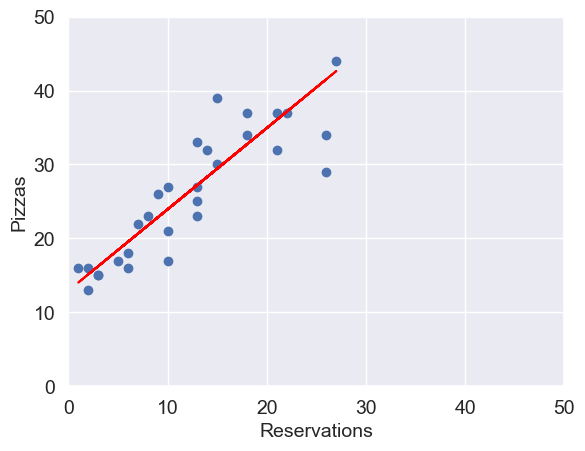

In [2]:
sea.set()
plt.axis([0., 50., 0., 50.])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Reservations", fontsize=14)
plt.ylabel("Pizzas", fontsize=14)
plt.plot(reservations, pizzas, "bo")
plt.plot(reservations, predict(reservations, w, b), color="red", label="Prediction")